In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#pd.set_option('display.max_columns', None) 
#pd.set_option('display.max_rows', None) 

In [2]:
df=pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/Pair trading/notebooks/Orders_strat_1.csv')
stock=pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/Pair trading/Returns data/sensex_close.csv')

In [3]:
for i in range(1,len(stock.columns)):
    stock.columns.values[i] = stock.columns.values[i][:-7]

stock


,Date,M&M.NS,MARUTI.NS,NESTLEIND.NS,NTPC.NS,POWERGRID.NS,RELIANCE.NS,SBIN.NS,SUNPHARMA.NS,TATAMOTORS.NS,...,HCLTECH.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,INFY.NS,ITC.NS,JSWSTEEL.NS,KOTAKBANK.NS,LT.NS
0,2011-01-03,354.620422,1290.611816,330.042328,103.102730,34.205589,435.470551,244.451538,222.953857,245.710617,...,84.377457,214.272614,250.432007,178.996750,245.397202,326.783081,84.445229,101.518600,226.530899,730.862915
1,2011-01-04,351.783600,1293.055542,334.839203,103.985962,34.240391,444.340057,236.958893,224.143433,243.823334,...,85.677994,210.243530,256.629883,172.617676,237.144684,328.965912,85.749603,99.524185,228.215866,729.054565
2,2011-01-05,347.190735,1278.303223,335.643555,103.648254,34.136005,443.803680,233.286163,223.296997,240.893860,...,87.758896,206.895676,260.468506,167.192352,230.932098,326.901215,86.860710,97.802521,222.467087,711.673218
3,2011-01-06,347.280792,1243.414551,329.865906,104.947121,34.449173,447.846588,227.153442,228.764481,236.800095,...,88.752892,208.648010,256.509827,164.706360,226.156754,328.654022,86.425919,93.715721,220.583893,693.000366
4,2011-01-07,333.344513,1213.232300,326.092957,102.375381,34.049000,439.513367,225.295456,225.721893,223.504761,...,86.439774,203.422287,250.352051,164.041885,213.499756,318.505707,83.334106,87.783630,215.677612,681.320557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,2023-12-22,1634.250000,10217.150391,2529.704590,300.772919,227.939011,2565.050049,636.750000,1236.600830,724.700012,...,1432.274536,1648.341187,2575.600098,994.299988,1562.349976,1562.900024,448.611328,855.299988,1860.500000,3477.949951
3200,2023-12-26,1662.250000,10270.650391,2549.010254,307.527405,229.512711,2578.050049,638.049988,1240.428955,719.549988,...,1427.819336,1659.784912,2584.750000,995.099976,1570.800049,1543.949951,449.843231,852.299988,1886.849976,3490.050049
3201,2023-12-27,1687.949951,10288.500000,2564.805420,304.001160,230.201187,2586.850098,648.549988,1245.350830,740.900024,...,1441.430298,1680.354126,2608.300049,1002.250000,1597.449951,1567.099976,450.483826,875.900024,1902.349976,3544.000000
3202,2023-12-28,1734.449951,10271.599609,2617.601562,311.798615,235.168152,2605.550049,651.400024,1254.995972,753.900024,...,1441.821777,1682.277710,2633.800049,1005.900024,1610.550049,1562.650024,457.382507,880.799988,1921.349976,3518.050049


In [4]:
group1=df.iloc[:136]


In [5]:
groups = [['SUNPHARMA.NS', 'TATAMOTORS.NS', 'TCS.NS', 'TECHM.NS', 'WIPRO.NS', 'HCLTECH.NS', 'INFY.NS'],
          ['MARUTI.NS', 'POWERGRID.NS', 'SBIN.NS', 'AXISBANK.NS', 'ICICIBANK.NS'],
          ['NESTLEIND.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'ASIANPAINT.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'INDUSINDBK.NS', 'ITC.NS', 'KOTAKBANK.NS'],
          ['RELIANCE.NS', 'JSWSTEEL.NS']]

use2=stock[['Date','SUNPHARMA.NS','TATAMOTORS.NS','TCS.NS','TECHM.NS','WIPRO.NS','HCLTECH.NS','INFY.NS']]



use2['signal_sunpharma']=0
group1 = df.iloc[:136]
sunpharma_filter = group1[group1['Stock'] == 'SUNPHARMA.NS']
tatamotors_filter = group1[group1['Stock'] == 'TATAMOTORS.NS']
tcs_filter = group1[group1['Stock'] == 'TCS.NS']
techm_filter = group1[group1['Stock'] == 'TECHM.NS']
wipro_filter = group1[group1['Stock'] == 'WIPRO.NS']
hcltech_filter = group1[group1['Stock'] == 'HCLTECH.NS']
infy_filter = group1[group1['Stock'] == 'INFY.NS']

signal_dict = {'Buy': 1, 'Sell': -1}

for _, row in sunpharma_filter.iterrows():
    date=row['Date']
    order=row['Order']
    use2.loc[use2['Date']==date,'signal_sunpharma']=signal_dict.get(order,0)

for _, row in tatamotors_filter.iterrows():
    date=row['Date']
    order=row['Order']
    use2.loc[use2['Date']==date,'signal_tatamotors']=signal_dict.get(order,0)

for _, row in tcs_filter.iterrows():
    date=row['Date']
    order=row['Order']
    use2.loc[use2['Date']==date,'signal_tcs']=signal_dict.get(order,0)

for _, row in techm_filter.iterrows():
    date=row['Date']
    order=row['Order']
    use2.loc[use2['Date']==date,'signal_techm']=signal_dict.get(order,0)

for _, row in wipro_filter.iterrows():
    date=row['Date']
    order=row['Order']
    use2.loc[use2['Date']==date,'signal_wipro']=signal_dict.get(order,0)

for _, row in hcltech_filter.iterrows():
    date=row['Date']
    order=row['Order']
    use2.loc[use2['Date']==date,'signal_hcltech']=signal_dict.get(order,0)

for _, row in infy_filter.iterrows():
    date=row['Date']
    order=row['Order']
    use2.loc[use2['Date']==date,'signal_infy']=signal_dict.get(order,0)


/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_52056/3506778578.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use2['signal_sunpharma']=0
/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_52056/3506778578.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use2.loc[use2['Date']==date,'signal_tatamotors']=signal_dict.get(order,0)
/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_52056/3506778578.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [17]:
use1=use2.iloc[:700]


In [18]:
profit = 0

for i in range(len(group1)):
    if(group1.iloc[i]['Order'] == 'Buy'):
        profit -= group1.iloc[i]['Price']
    else:
        profit += group1.iloc[i]['Price']

profit

2889.4613037109375

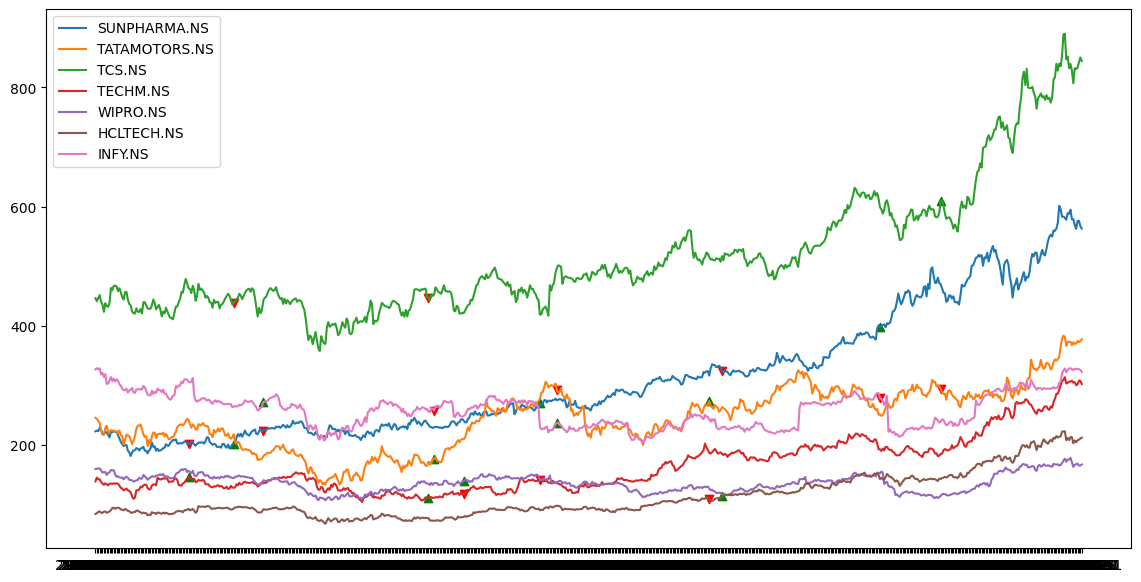

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(use1['Date'],use1['SUNPHARMA.NS'],label='SUNPHARMA.NS')
plt.plot(use1['Date'],use1['TATAMOTORS.NS'],label='TATAMOTORS.NS')
plt.plot(use1['Date'],use1['TCS.NS'],label='TCS.NS')
plt.plot(use1['Date'],use1['TECHM.NS'],label='TECHM.NS')
plt.plot(use1['Date'],use1['WIPRO.NS'],label='WIPRO.NS')
plt.plot(use1['Date'],use1['HCLTECH.NS'],label='HCLTECH.NS')
plt.plot(use1['Date'],use1['INFY.NS'],label='INFY.NS')

plt.scatter(use1[use1['signal_sunpharma'] == -1]['Date'], use1[use1['signal_sunpharma'] == -1]['SUNPHARMA.NS'], marker='v', color='r')
plt.scatter(use1[use1['signal_sunpharma'] == 1]['Date'], use1[use1['signal_sunpharma'] == 1]['SUNPHARMA.NS'], marker='^', color='g')

plt.scatter(use1[use1['signal_tatamotors'] == -1]['Date'], use1[use1['signal_tatamotors'] == -1]['TATAMOTORS.NS'], marker='v', color='r')
plt.scatter(use1[use1['signal_tatamotors'] == 1]['Date'], use1[use1['signal_tatamotors'] == 1]['TATAMOTORS.NS'], marker='^', color='g')

plt.scatter(use1[use1['signal_tcs'] == -1]['Date'], use1[use1['signal_tcs'] == -1]['TCS.NS'], marker='v', color='r')
plt.scatter(use1[use1['signal_tcs'] == 1]['Date'], use1[use1['signal_tcs'] == 1]['TCS.NS'], marker='^', color='g')

plt.scatter(use1[use1['signal_techm'] == -1]['Date'], use1[use1['signal_techm'] == -1]['TECHM.NS'], marker='v', color='r')
plt.scatter(use1[use1['signal_techm'] == 1]['Date'], use1[use1['signal_techm'] == 1]['TECHM.NS'], marker='^', color='g')

plt.scatter(use1[use1['signal_wipro'] == -1]['Date'], use1[use1['signal_wipro'] == -1]['WIPRO.NS'], marker='v', color='r')
plt.scatter(use1[use1['signal_wipro'] == 1]['Date'], use1[use1['signal_wipro'] == 1]['WIPRO.NS'], marker='^', color='g')

plt.scatter(use1[use1['signal_hcltech'] == -1]['Date'], use1[use1['signal_hcltech'] == -1]['HCLTECH.NS'], marker='v', color='r')
plt.scatter(use1[use1['signal_hcltech'] == 1]['Date'], use1[use1['signal_hcltech'] == 1]['HCLTECH.NS'], marker='^', color='g')

plt.scatter(use1[use1['signal_infy'] == -1]['Date'], use1[use1['signal_infy'] == -1]['INFY.NS'], marker='v', color='r')
plt.scatter(use1[use1['signal_infy'] == 1]['Date'], use1[use1['signal_infy'] == 1]['INFY.NS'], marker='^', color='g')

plt.legend()
plt.show()